In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [2]:
coal_power_plant = pd.read_csv('../GEM_original_data/India_coal_power_plants.csv')
coal_power_plant = coal_power_plant[coal_power_plant['Status'] == 'operating']

In [3]:
color = ['tab:blue', 'tab:orange']

State_name = ['Bihar', 'Jharkhand', 'Odisha',
              'Sikkim', 'West Bengal', 'Arunachal Pradesh',
              'Assam', 'Meghalaya', 'Manipur',
              'Mizoram', 'Nagaland', 'Tripura',
              'Delhi', 'Himachal Pradesh', 'Haryana',
              'Jammu and Kashmir', 'Punjab', 'Rajasthan',
              'Uttarakhand', 'Uttar Pradesh', 'Andhra Pradesh',
              'Karnataka', 'Kerala', 'Tamil Nadu',
              'Telangana', 'Chhattisgarh', 'Goa',
              'Gujarat', 'Maharashtra', 'Madhya Pradesh']


/var/folders/9p/t6ljp_1516q16t2lqgyjw0w80000gp/T/ipykernel_9745/1126525134.py:18: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  pointInPolys = gpd.tools.sjoin(plants, States, predicate="within", how='left')
/var/folders/9p/t6ljp_1516q16t2lqgyjw0w80000gp/T/ipykernel_9745/1126525134.py:18: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  pointInPolys = gpd.tools.sjoin(plants, States, predicate="within", how='left')


<Figure size 640x480 with 0 Axes>

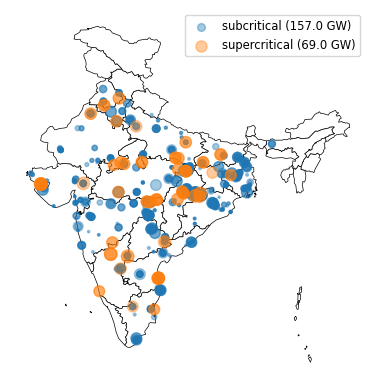

In [4]:

fp = '../india-polygon.shp'
States = gpd.GeoDataFrame.from_file(fp)
tech_list = ['subcritical', 'supercritical']

data = np.zeros((len(State_name), 2))
dataframe = pd.DataFrame(data, columns=tech_list)

fig = plt.figure()
ax = States.plot(edgecolor='k', color='white', linewidth=0.5)

for t in range(len(tech_list)):
    power_type = coal_power_plant[coal_power_plant['Combustion technology'] == tech_list[t]]

    geometry = [Point(xy) for xy in zip(power_type['Longitude'],
                                        power_type['Latitude'])]

    plants = gpd.GeoDataFrame(power_type, geometry=geometry)
    pointInPolys = gpd.tools.sjoin(plants, States, predicate="within", how='left')
    EachTech = plants[pointInPolys['Combustion technology'] == tech_list[t]]
    ax1 = EachTech.plot(ax=ax, color=color[t],
                        markersize=EachTech['Capacity (MW)']/10, alpha=0.4,
                        label=tech_list[t]+
                              ' ('+ str(np.round(sum(EachTech['Capacity (MW)']/1000), 0))
                              +' GW)')
    ax1.legend(loc='upper right', fontsize='small')

    for p in range(len(State_name)):
        EachState = plants[pointInPolys.st_nm == State_name[p]]
        dataframe[tech_list[t]][p] = np.round(sum(EachState['Capacity (MW)'])/1000,2)


plt.xlabel('Lon')
plt.ylabel('Lat')
ax.set_axis_off()
plt.savefig('804_coal_plant_locations.png',  bbox_inches='tight')

In [5]:
gem_sub_critical   = pd.read_csv('../gem_predicted_subcritical.csv')
gem_super_critical = pd.read_csv('../gem_predicted_supercritical.csv')

<Figure size 640x480 with 0 Axes>

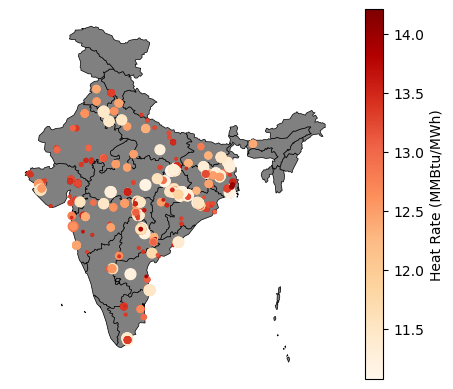

In [6]:
from shapely.geometry import Point

fp = '../india-polygon.shp'
States = gpd.GeoDataFrame.from_file(fp)

fig = plt.figure()
ax = States.plot(edgecolor='k', color='gray', linewidth=0.5)
geometry = [Point(xy) for xy in zip(gem_sub_critical['Longitude'],
                                    gem_sub_critical['Latitude'])]
gem_sub_critical = gpd.GeoDataFrame(gem_sub_critical, geometry= geometry)
cm = ax.scatter(gem_sub_critical['Longitude'], gem_sub_critical['Latitude'],
            c=gem_sub_critical['Predicted_HR_50.0'], cmap='OrRd',
                    s=gem_sub_critical['Capacity (MW)']/10)
ax.set_axis_off()
cbar = plt.colorbar(cm, ax=ax)
cbar.set_label('Heat Rate (MMBtu/MWh)')
plt.savefig('predicted_subcritical_coal_plant_map.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

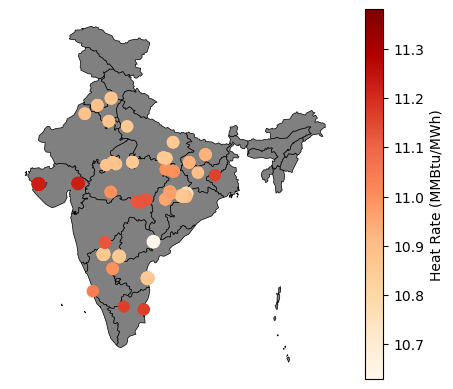

In [7]:
fig = plt.figure()
ax = States.plot(edgecolor='k', color='gray', linewidth=0.5)
geometry = [Point(xy) for xy in zip(gem_super_critical['Longitude'],
                                    gem_super_critical['Latitude'])]
gem_sub_critical = gpd.GeoDataFrame(gem_super_critical, geometry=geometry)
cm = ax.scatter(gem_super_critical['Longitude'], gem_super_critical['Latitude'],
            c=gem_super_critical['Predicted_HR_50.0'], cmap='OrRd',
                    s=gem_super_critical['Capacity (MW)']/10)
ax.set_axis_off()
cbar = plt.colorbar(cm, ax=ax)
cbar.set_label('Heat Rate (MMBtu/MWh)')
plt.savefig('predicted_supercritical_coal_plant_map.png', bbox_inches='tight')